# **1. Perkenalan Dataset**


**Sumber Dataset**:  
   https://www.kaggle.com/datasets/adhang/air-quality-in-yogyakarta-indonesia-2020

**Informasi Dataset**:


*   Date - Date of measurements
*   PM10 - Particulate Matter measurements
*   SO2 - Sulfur Dioxide measurements
*   CO - Carbon Monoxide measurements
*   O3 - Ozone measurements
*   Max - The highest measurement value
*   Critical Component - Component(s) that has the highest measurement value
*   Category - Category of air pollution, whether it's good or not

# **2. Import Library**

Pada tahap ini, saya perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import os, shutil
import gdown
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **3. Memuat Dataset**

Pada tahap ini, saya perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, saya menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, saya menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Buat direktori .kaggle
os.makedirs("/root/.kaggle", exist_ok=True)

# Copy file dari Google Drive
shutil.copy("/content/drive/MyDrive/kaggle/kaggle.json", "/root/.kaggle/kaggle.json")

# Ubah permission-nya
os.chmod("/root/.kaggle/kaggle.json", 600)

In [5]:
!kaggle datasets download -d adhang/air-quality-in-yogyakarta-indonesia-2020

Dataset URL: https://www.kaggle.com/datasets/adhang/air-quality-in-yogyakarta-indonesia-2020
License(s): copyright-authors
air-quality-in-yogyakarta-indonesia-2020.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip air-quality-in-yogyakarta-indonesia-2020.zip -d air-quality-in-yogyakarta-indonesia-2020

Archive:  air-quality-in-yogyakarta-indonesia-2020.zip
replace air-quality-in-yogyakarta-indonesia-2020/pollutant-standards-index-jogja-2020.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [7]:
df = pd.read_csv('air-quality-in-yogyakarta-indonesia-2020/pollutant-standards-index-jogja-2020.csv')

In [8]:
df.head()

,Date,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2020,30,2,69,19,0,69,CO,Moderate
1,1/2/2020,16,2,58,33,0,58,CO,Moderate
2,1/3/2020,12,2,46,18,0,46,CO,Good
3,1/4/2020,8,2,84,29,0,84,CO,Moderate
4,1/5/2020,8,3,50,0,0,50,CO,Good


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                366 non-null    object
 1   PM10                366 non-null    int64 
 2   SO2                 366 non-null    int64 
 3   CO                  366 non-null    int64 
 4   O3                  366 non-null    int64 
 5   NO2                 366 non-null    int64 
 6   Max                 366 non-null    int64 
 7   Critical Component  366 non-null    object
 8   Category            366 non-null    object
dtypes: int64(6), object(3)
memory usage: 25.9+ KB


In [10]:
df.describe()

,PM10,SO2,CO,O3,NO2,Max
count,366.000000,366.000000,366.000000,366.000000,366.0,366.000000
mean,19.699454,1.021858,31.161202,16.054645,0.0,35.800546
std,9.023704,1.012017,22.263521,14.172026,0.0,21.397890
min,3.000000,0.000000,0.000000,0.000000,0.0,11.000000
25%,14.000000,0.000000,18.000000,7.000000,0.0,21.000000
50%,18.500000,1.000000,23.500000,14.000000,0.0,28.000000
75%,23.000000,2.000000,40.000000,22.000000,0.0,45.000000
max,60.000000,6.000000,164.000000,81.000000,0.0,164.000000


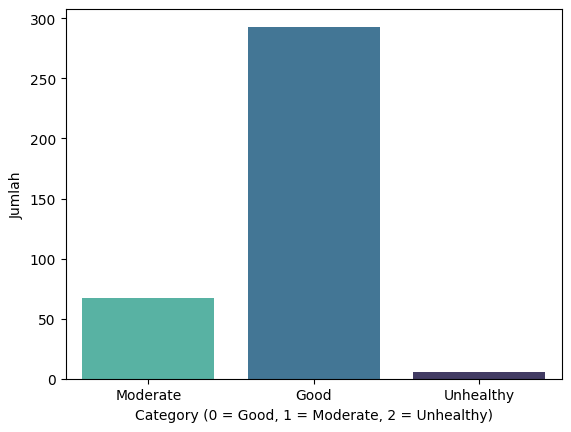

In [11]:
sns.countplot(x='Category', data=df, hue='Category', palette='mako_r', legend=False)
plt.xlabel("Category (0 = Good, 1 = Moderate, 2 = Unhealthy)")
plt.ylabel("Jumlah")
plt.show()

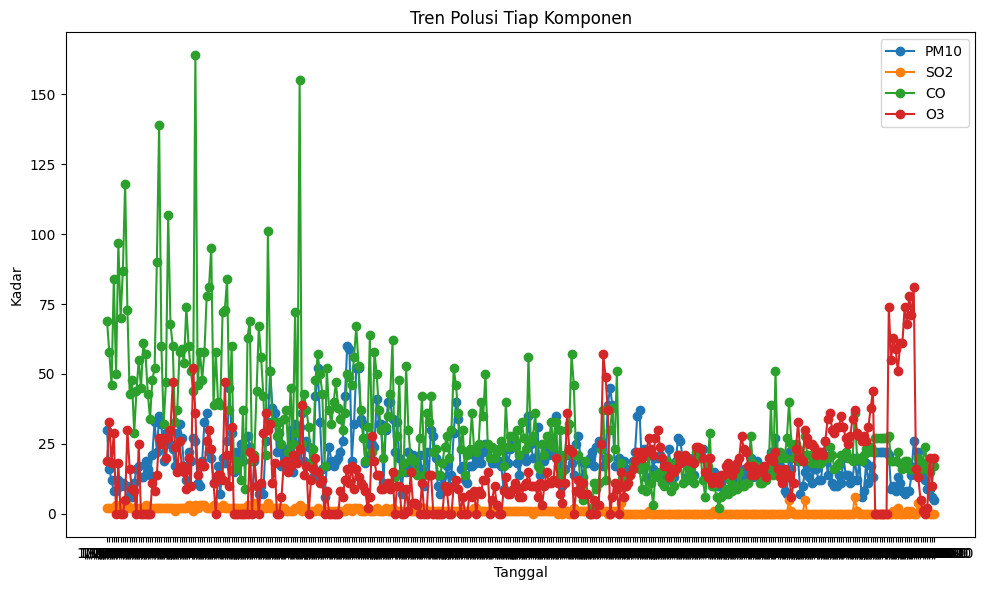

In [12]:
plt.figure(figsize=(10, 6))
for col in ["PM10", "SO2", "CO", "O3"]:
    plt.plot(df["Date"], df[col], marker='o', label=col)
plt.title("Tren Polusi Tiap Komponen")
plt.xlabel("Tanggal")
plt.ylabel("Kadar")
plt.legend()
plt.tight_layout()
plt.show()

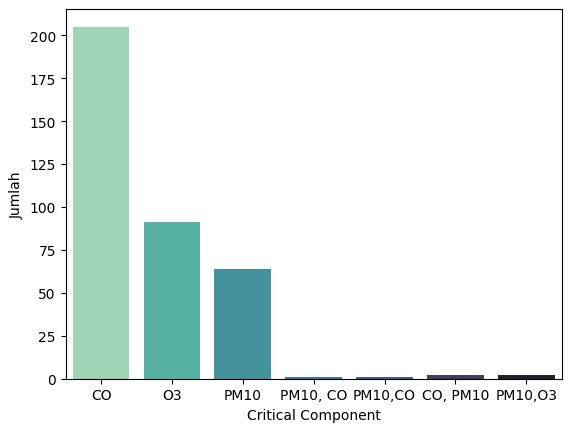

In [13]:
sns.countplot(x='Critical Component', data=df, hue='Critical Component', palette='mako_r', legend=False)
plt.xlabel("Critical Component")
plt.ylabel("Jumlah")
plt.show()

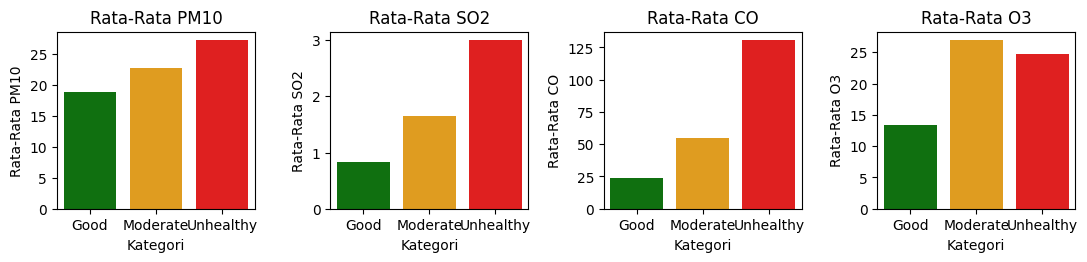

In [14]:
# Plotting grafik rata-rata nilai parameter udara pada setiap kategori
numeric_columns = ['PM10', 'SO2', 'CO', 'O3']
avg_air_quality_by_category = df.groupby('Category')[numeric_columns].mean()
plt.figure(figsize=(11, 7))

# Loop untuk setiap kolom parameter
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.barplot(x=avg_air_quality_by_category.index, y=column, data=avg_air_quality_by_category, palette=['green', 'orange', 'red'])
    plt.title(f'Rata-Rata {column.upper()}')
    plt.xlabel('Kategori')
    plt.ylabel(f'Rata-Rata {column.upper()}')

plt.tight_layout()
plt.show()

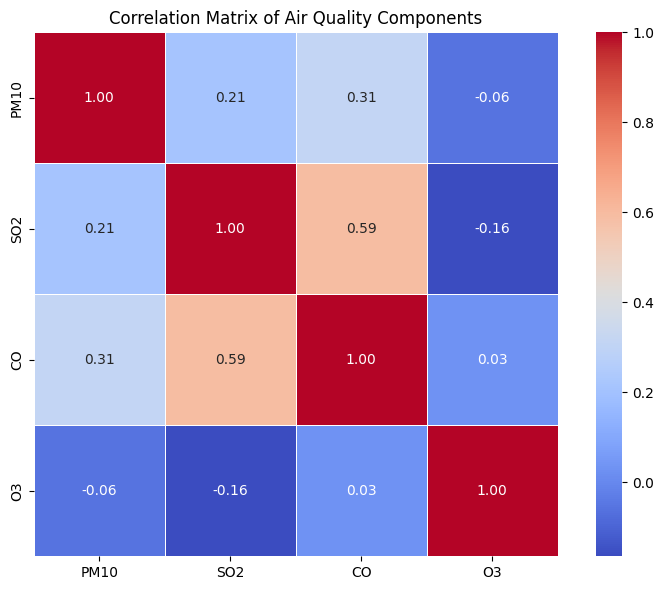

In [22]:
# Korelasi hanya untuk kolom numerik
numeric_columns = df[['PM10', 'SO2', 'CO', 'O3']]
corr = numeric_columns.corr()

# Heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Air Quality Components")
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [23]:
df = df.drop('Date', axis=1)
df = df.drop('NO2', axis=1)
df = df.drop('Max', axis=1)
df = df.drop('Critical Component', axis=1)

In [24]:
# Membuat objek LabelEncoder
labelencoder = LabelEncoder()

# Mengubah nilai kategorikal menjadi numerik
df['Category'] = labelencoder.fit_transform(df['Category'])

In [25]:
# Menampilkan lima baris pertama dari dataframe yang telah diubah
df.head()

,PM10,SO2,CO,O3,Category
0,30,2,69,19,1
1,16,2,58,33,1
2,12,2,46,18,0
3,8,2,84,29,1
4,8,3,50,0,0


In [26]:
columns_to_normalize = ['PM10', 'SO2', 'CO', 'O3']

scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [27]:
df.head()

,PM10,SO2,CO,O3,Category
0,0.473684,0.333333,0.420732,0.234568,1
1,0.228070,0.333333,0.353659,0.407407,1
2,0.157895,0.333333,0.280488,0.222222,0
3,0.087719,0.333333,0.512195,0.358025,1
4,0.087719,0.500000,0.304878,0.000000,0


In [28]:
y = df.Category.values
X = df.drop(['Category'], axis = 1)

In [29]:
# Membagi dataset menjadi data training (80%) dan data testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [30]:
# Menampilkan jumlah data training dan data testing
print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

Jumlah data training: 292
Jumlah data testing: 74


In [31]:
# Gabungkan X_train dan y_train
train_data = X_train.copy()
train_data['Category'] = y_train
train_data.to_csv('train_data.csv', index=False)

# Gabungkan X_test dan y_test
test_data = X_test.copy()
test_data['Category'] = y_test
test_data.to_csv('test_data.csv', index=False)